In [1]:
library(stringi)

In [2]:
#ids.reversed = TRUE

cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.prefilterMerge_impute_knnRes.30_objs_standard_constraints_None/aggregate/cells_meta.tsv"
se_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/annotation/gff_A2/mergedSamples/allSamples.integrated.rds"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.prefilterMerge_impute_knnRes.30_objs_standard_constraints_None/aggregate/annotation"
clone_order_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.prefilterMerge_impute_knnRes.30_objs_standard_constraints_None/aggregate/cloneOrder.tsv"
# cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.init_knnRes.30_objs_standard/aggregate/cells_meta.tsv" 
# se_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/annotation/gff_A2/mergedSamples/allSamples.integrated.rds" 
# outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.init_knnRes.30_objs_standard/aggregate/annotation/"
#clone_order_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.init_knnRes.30_objs_standard/aggregate/cloneOrder.tsv"  

gff_id = "A2_black"
annotations_indir = "/mnt/md0/isshamie/Projects/Mito_Trace/data/processed/annotation_granges/"

save_large_se = FALSE

In [3]:
annotations <- readRDS(file.path(annotations_indir, paste0(gff_id, ".annotationGranges.rds")))

In [4]:
cells_meta <- as.data.frame(readr::read_tsv(cells_meta_f, )) # %>% tidyr::unite(barcode)
rownames(cells_meta) = cells_meta$cell

Rows: 10776 Columns: 42
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (12): cell, orig.ident, cell_id, proj, high.tss, nucleosome_group, ID, R...
dbl (30): nCount_ATAC, nFeature_ATAC, total, duplicate, chimeric, unmapped, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# if (ids.reversed){
#     split.names <- stringr::str_split(rownames(cells_meta), "_")
#     rownames(cells_meta) = lapply(split.names, function(x){paste0(x[2], "_", x[1])})
# }
# head(cells_meta)

In [6]:
se <- readRDS(se_f)
se[[]]

Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.1.3”
Attaching sp



,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5219,5219,25798,3956,111,95,1643,4740,15253,⋯,0.46,30.59726,0,High,NS < 4,5,5,12.34983,8908,5567
cd34norm_Flt3l_AAACGAAAGCGATACG-1,Flt3l,2350,2350,18340,2478,78,92,794,9325,5573,⋯,0.62,38.07644,0,High,NS < 4,3,3,11.19906,3006,2472
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,Flt3l,4322,4322,28417,4398,132,122,1771,10224,11770,⋯,0.30,32.71878,0,High,NS < 4,2,2,12.07782,6521,4620
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1542,1542,12018,1524,60,45,585,5688,4116,⋯,0.06,32.28863,0,High,NS < 4,5,5,10.59152,2356,1996
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3251,3251,37690,3034,82,125,1680,24974,7795,⋯,0.69,37.78063,0,High,NS < 4,1,1,11.66711,4275,3340
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1488,1488,9381,1416,44,50,547,3616,3708,⋯,0.22,34.49299,0,High,NS < 4,5,5,10.54013,2150,1864
cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3107,3107,30421,5698,112,157,1762,14034,8658,⋯,0.63,31.17348,0,High,NS < 4,8,8,11.60177,5338,3881
cd34norm_Flt3l_AAACGAACACGATATC-1,Flt3l,2626,2626,15245,1960,89,32,737,5330,7097,⋯,0.11,32.04171,0,High,NS < 4,4,4,11.35920,4225,3237
cd34norm_Flt3l_AAACGAACACTTACAG-1,Flt3l,10897,10897,48515,10680,240,158,2715,12096,22626,⋯,0.36,47.67966,0,High,NS < 4,15,15,13.41178,13471,7325


## RenameCells to remove the extra names added

In [7]:
# map_donors = c(("CHIP_a11", "CHIP_a1"), ("CHIP_a12", "CHIP_a1"), 
#                ("CHIP_b11", "CHIP_b1"), ("CHIP_b12", "CHIP_b1"),
#                ("CHIP_b21", "CHIP_b2"), ("CHIP_b22", "CHIP_b2"))
map_donors = list("CHIP_a11"="CHIP_a1", "CHIP_a12"="CHIP_a1",
                  "CHIP_b11" = "CHIP_b1", "CHIP_b12" = "CHIP_b1",
                  "CHIP_b21" = "CHIP_b2", "CHIP_b22" = "CHIP_b2")
map_donors


new.names <- lapply(row.names(se[[]]), function(s) {stri_replace_all_regex(s, names(map_donors), unlist(map_donors, use.names=F), vectorize=F)})
             
head(new.names)


$CHIP_a11
[1] "CHIP_a1"

$CHIP_a12
[1] "CHIP_a1"

$CHIP_b11
[1] "CHIP_b1"

$CHIP_b12
[1] "CHIP_b1"

$CHIP_b21
[1] "CHIP_b2"

$CHIP_b22
[1] "CHIP_b2"

[[1]]
[1] "cd34norm_Flt3l_AAACGAAAGAGCTCCC-1"

[[2]]
[1] "cd34norm_Flt3l_AAACGAAAGCGATACG-1"

[[3]]
[1] "cd34norm_Flt3l_AAACGAAAGGCTTCGC-1"

[[4]]
[1] "cd34norm_Flt3l_AAACGAAAGTACAACA-1"

[[5]]
[1] "cd34norm_Flt3l_AAACGAACAACGTACT-1"

[[6]]
[1] "cd34norm_Flt3l_AAACGAACAAGCGGTA-1"

In [8]:
se <- RenameCells(se, 
                  old.names=names(new.names), 
                  new.names=unlist(new.names, use.names=F))
se[[]]

Warning message:
“The following arguments are not used: old.names”
Loading required package: Signac

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS



,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5219,5219,25798,3956,111,95,1643,4740,15253,⋯,0.46,30.59726,0,High,NS < 4,5,5,12.34983,8908,5567
cd34norm_Flt3l_AAACGAAAGCGATACG-1,Flt3l,2350,2350,18340,2478,78,92,794,9325,5573,⋯,0.62,38.07644,0,High,NS < 4,3,3,11.19906,3006,2472
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,Flt3l,4322,4322,28417,4398,132,122,1771,10224,11770,⋯,0.30,32.71878,0,High,NS < 4,2,2,12.07782,6521,4620
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1542,1542,12018,1524,60,45,585,5688,4116,⋯,0.06,32.28863,0,High,NS < 4,5,5,10.59152,2356,1996
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3251,3251,37690,3034,82,125,1680,24974,7795,⋯,0.69,37.78063,0,High,NS < 4,1,1,11.66711,4275,3340
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1488,1488,9381,1416,44,50,547,3616,3708,⋯,0.22,34.49299,0,High,NS < 4,5,5,10.54013,2150,1864
cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3107,3107,30421,5698,112,157,1762,14034,8658,⋯,0.63,31.17348,0,High,NS < 4,8,8,11.60177,5338,3881
cd34norm_Flt3l_AAACGAACACGATATC-1,Flt3l,2626,2626,15245,1960,89,32,737,5330,7097,⋯,0.11,32.04171,0,High,NS < 4,4,4,11.35920,4225,3237
cd34norm_Flt3l_AAACGAACACTTACAG-1,Flt3l,10897,10897,48515,10680,240,158,2715,12096,22626,⋯,0.36,47.67966,0,High,NS < 4,15,15,13.41178,13471,7325


## Merge clones and se

In [9]:

new_cells_meta = merge(cells_meta[c("name", "run", "donor", "condition")],
                       se[[]], by=0, all=TRUE)
rownames(new_cells_meta) <- new_cells_meta$Row.names
sample(new_cells_meta, 10)

,blacklist_ratio,peak_region_fragments,DNase_sensitive_region_fragments,Row.names,high.tss,TSS_fragments,blacklist_region_fragments,cell_id,nFeature_RNA,pct_reads_in_peaks
,<dbl>,<dbl>,<dbl>,<I<chr>>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,0,4667,0,cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,High,2708,0,_cell_0,5567,30.59726
cd34norm_Flt3l_AAACGAAAGCGATACG-1,0,2122,0,cd34norm_Flt3l_AAACGAAAGCGATACG-1,High,1062,0,_cell_1,2472,38.07644
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,0,3851,0,cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,High,2145,0,_cell_2,4620,32.71878
cd34norm_Flt3l_AAACGAAAGTACAACA-1,0,1329,0,cd34norm_Flt3l_AAACGAAAGTACAACA-1,High,727,0,_cell_3,1996,32.28863
cd34norm_Flt3l_AAACGAACAACGTACT-1,0,2945,0,cd34norm_Flt3l_AAACGAACAACGTACT-1,High,1562,0,_cell_4,3340,37.78063
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,0,1279,0,cd34norm_Flt3l_AAACGAACAAGCGGTA-1,High,705,0,_cell_5,1864,34.49299
cd34norm_Flt3l_AAACGAACACCTGGTG-1,0,2699,0,cd34norm_Flt3l_AAACGAACACCTGGTG-1,High,1708,0,_cell_6,3881,31.17348
cd34norm_Flt3l_AAACGAACACGATATC-1,0,2274,0,cd34norm_Flt3l_AAACGAACACGATATC-1,High,1273,0,_cell_7,3237,32.04171
cd34norm_Flt3l_AAACGAACACTTACAG-1,0,10788,0,cd34norm_Flt3l_AAACGAACACTTACAG-1,High,4793,0,_cell_8,7325,47.67966


In [10]:
unique(new_cells_meta$expID)

new_cells_meta$expID <- unlist(lapply(new_cells_meta$expID, 
                                      function(s) {stri_replace_all_regex(s, names(map_donors), unlist(map_donors, use.names=F), vectorize=F)}), 
                               use.names=F)



[1] "cd34norm_Flt3l" "CHIP_a12_Flt3l" "CHIP_a11_Input" "CHIP_b11_Flt3l"
[5] "CHIP_b12_Input" "CHIP_b2_Input"

In [11]:
# se$ID <- apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[1]],  "_", x[[2]])})
# se <- RenameCells(se, new.names=se$ID)


In [12]:
donor_levels <- levels(factor(new_cells_meta$donor))
donor_levels[length(donor_levels) + 1] <- "None"


In [13]:
condition_levels <- levels(factor(new_cells_meta$condition))
condition_levels[length(condition_levels) + 1] <- "None"

lineage_levels <- levels(factor(new_cells_meta$lineage))
lineage_levels[length(lineage_levels) + 1] <- "None"



In [14]:
#new_cells_meta$name <- paste0(new_cells_meta$donor, "_", new_cells_meta$lineage)
name_levels <- levels(factor(new_cells_meta$name))
name_levels[length(name_levels) + 1] <- "None"



In [15]:
new_cells_meta$donor <- factor(new_cells_meta$donor, levels=donor_levels)
new_cells_meta$condition <- factor(new_cells_meta$condition, levels=condition_levels)
#new_cells_meta$lineage <- factor(new_cells_meta$lineage, levels=lineage_levels)
new_cells_meta$name <- factor(new_cells_meta$name, levels=name_levels)



In [16]:
#new_cells_meta$name <- paste0(new_cells_meta$donor, "_", new_cells_meta$lineage)
new_cells_meta$donor[is.na(new_cells_meta$donor)] <- "None"
new_cells_meta$condition[is.na(new_cells_meta$condition)] <- "None"
new_cells_meta$name[(is.na(new_cells_meta$name) | grepl("NA", new_cells_meta$name))] <- "None"

#new_cells_meta$lineage[is.na(new_cells_meta$lineage)] <- "None"


In [17]:
new_cells_meta

,Row.names,name,run,donor,condition,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA
,<I<chr>>,<fct>,<chr>,<fct>,<fct>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,None,NA,None,None,Flt3l,5219,5219,25798,3956,⋯,0.46,30.59726,0,High,NS < 4,5,5,12.34983,8908,5567
cd34norm_Flt3l_AAACGAAAGCGATACG-1,cd34norm_Flt3l_AAACGAAAGCGATACG-1,None,NA,None,None,Flt3l,2350,2350,18340,2478,⋯,0.62,38.07644,0,High,NS < 4,3,3,11.19906,3006,2472
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,None,NA,None,None,Flt3l,4322,4322,28417,4398,⋯,0.30,32.71878,0,High,NS < 4,2,2,12.07782,6521,4620
cd34norm_Flt3l_AAACGAAAGTACAACA-1,cd34norm_Flt3l_AAACGAAAGTACAACA-1,None,NA,None,None,Flt3l,1542,1542,12018,1524,⋯,0.06,32.28863,0,High,NS < 4,5,5,10.59152,2356,1996
cd34norm_Flt3l_AAACGAACAACGTACT-1,cd34norm_Flt3l_AAACGAACAACGTACT-1,cd34norm_2_4,cd34norm,cd34norm_2,Flt3l,Flt3l,3251,3251,37690,3034,⋯,0.69,37.78063,0,High,NS < 4,1,1,11.66711,4275,3340
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,cd34norm_Flt3l_AAACGAACAAGCGGTA-1,None,NA,None,None,Flt3l,1488,1488,9381,1416,⋯,0.22,34.49299,0,High,NS < 4,5,5,10.54013,2150,1864
cd34norm_Flt3l_AAACGAACACCTGGTG-1,cd34norm_Flt3l_AAACGAACACCTGGTG-1,cd34norm_2_8,cd34norm,cd34norm_2,Flt3l,Flt3l,3107,3107,30421,5698,⋯,0.63,31.17348,0,High,NS < 4,8,8,11.60177,5338,3881
cd34norm_Flt3l_AAACGAACACGATATC-1,cd34norm_Flt3l_AAACGAACACGATATC-1,cd34norm_2_5,cd34norm,cd34norm_2,Flt3l,Flt3l,2626,2626,15245,1960,⋯,0.11,32.04171,0,High,NS < 4,4,4,11.35920,4225,3237
cd34norm_Flt3l_AAACGAACACTTACAG-1,cd34norm_Flt3l_AAACGAACACTTACAG-1,None,NA,None,None,Flt3l,10897,10897,48515,10680,⋯,0.36,47.67966,0,High,NS < 4,15,15,13.41178,13471,7325


In [18]:
se <- AddMetaData(se, new_cells_meta)
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,ATAC_snn_res.0.8,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA,Row.names,name,run,donor,condition
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<dbl>,<int>,<I<chr>>,<fct>,<chr>,<fct>,<fct>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5219,5219,25798,3956,111,95,1643,4740,15253,⋯,5,5,12.34983,8908,5567,cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,None,NA,None,None
cd34norm_Flt3l_AAACGAAAGCGATACG-1,Flt3l,2350,2350,18340,2478,78,92,794,9325,5573,⋯,3,3,11.19906,3006,2472,cd34norm_Flt3l_AAACGAAAGCGATACG-1,None,NA,None,None
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,Flt3l,4322,4322,28417,4398,132,122,1771,10224,11770,⋯,2,2,12.07782,6521,4620,cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,None,NA,None,None
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1542,1542,12018,1524,60,45,585,5688,4116,⋯,5,5,10.59152,2356,1996,cd34norm_Flt3l_AAACGAAAGTACAACA-1,None,NA,None,None
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3251,3251,37690,3034,82,125,1680,24974,7795,⋯,1,1,11.66711,4275,3340,cd34norm_Flt3l_AAACGAACAACGTACT-1,cd34norm_2_4,cd34norm,cd34norm_2,Flt3l
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1488,1488,9381,1416,44,50,547,3616,3708,⋯,5,5,10.54013,2150,1864,cd34norm_Flt3l_AAACGAACAAGCGGTA-1,None,NA,None,None
cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3107,3107,30421,5698,112,157,1762,14034,8658,⋯,8,8,11.60177,5338,3881,cd34norm_Flt3l_AAACGAACACCTGGTG-1,cd34norm_2_8,cd34norm,cd34norm_2,Flt3l
cd34norm_Flt3l_AAACGAACACGATATC-1,Flt3l,2626,2626,15245,1960,89,32,737,5330,7097,⋯,4,4,11.35920,4225,3237,cd34norm_Flt3l_AAACGAACACGATATC-1,cd34norm_2_5,cd34norm,cd34norm_2,Flt3l
cd34norm_Flt3l_AAACGAACACTTACAG-1,Flt3l,10897,10897,48515,10680,240,158,2715,12096,22626,⋯,15,15,13.41178,13471,7325,cd34norm_Flt3l_AAACGAACACTTACAG-1,None,NA,None,None


In [19]:
se <- subset(x = se, subset = (name != "None") & (donor != "None") & (condition != "None"))


## Save

In [20]:
write.table(se[[]],file=file.path(outdir, "se_cells_meta.tsv"), sep = "\t", quote=FALSE)

## Plot by donor and condition

In [21]:
library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)

Warning message:
“package ‘magrittr’ was built under R version 4.1.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘future’ was built under R version 4.1.3”


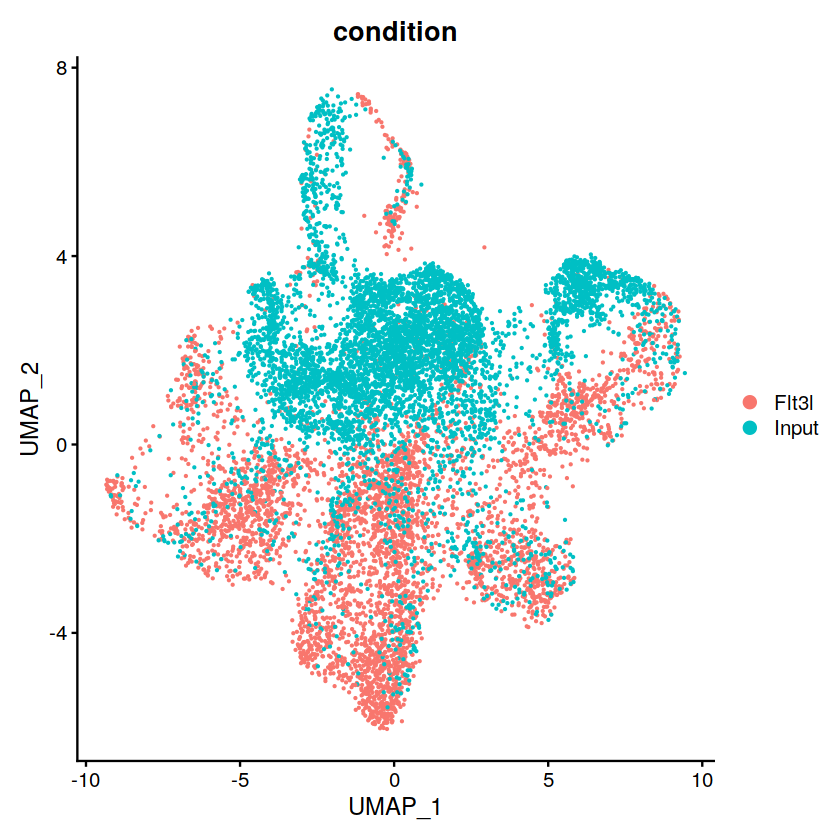

In [22]:
# Idents(t.cells) <- "orig.ident"
DimPlot(object = se, label = FALSE, group.by = c('condition')) 
ggsave(file.path(outdir, paste0("donor_condition.pdf")), width=16, height=16)


In [23]:

# plot top clones:
clone_order <- as.data.frame(readr::read_csv(clone_order_f,col_names=F))$X1
#clone_order

top.clones <- clone_order #clone_order[1:ntop.clones]
#top.clones

ntop.clones <- length(top.clones)

top.se <- subset(x = se, subset = name %in% top.clones)
top.se$name <- factor(x = top.se$name, levels =top.clones)

coord = max(max(Embeddings(top.se[["umap"]])), abs(min(Embeddings(top.se[["umap"]]))))

for (i in levels(droplevels(se$donor))){   
    tryCatch({
        don.top.se <- subset(x = top.se, subset = donor == i)
        curr.ntop.clones <- length(unique(don.top.se$name))
        don.top.se$name <- factor(x = don.top.se$name, levels = top.clones)
        #DimPlot(cd8, split.by = "orig.ident")
        d <- DimPlot(object = don.top.se, label = FALSE, split.by="name", ncol=1, 
                     combine=T,
                     group.by=c("seurat_clusters"), shape.by=c("condition"), pt.size=(curr.ntop.clones)) +
            xlim(-1*coord-0.01,coord+0.01) +
            ylim(-1*coord-0.01,coord+0.01) + 
            theme(text = element_text(size = 2*curr.ntop.clones)) +
            theme(axis.text = element_text(size = 2*curr.ntop.clones))
        ggsave(file.path(outdir, paste(i,"top_umap_clust_col.svg")), width=2*curr.ntop.clones, height=8*curr.ntop.clones, device='svg', units="in", limitsize = FALSE)
        ggsave(file.path(outdir, paste(i,"top_umap_clust_col.pdf")), width=2*curr.ntop.clones, height=8*curr.ntop.clones, units="in", limitsize = FALSE)
    },
    error=function(cond){
        message("donor missing")
        message(cond)}
    )
}


Rows: 66 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
d <- DimPlot(object = top.se, label = FALSE, split.by="donor", combine=T, ncol=3, pt.size=(ntop.clones/4)) +
    xlim(-1*coord-0.01,coord+0.01) +
    ylim(-1*coord-0.01,coord+0.01) + 
    theme(text = element_text(size = 2*ntop.clones)) +
    theme(axis.text = element_text(size = 2*ntop.clones))

ggsave(file.path(outdir, paste("donor_umap.svg")), width=2*ntop.clones, 
       height=8*ntop.clones, device='svg', units="in", limitsize = FALSE)
ggsave(file.path(outdir, paste("donor_umap.pdf")), width=2*ntop.clones, 
       height=8*ntop.clones, units="in", limitsize = FALSE)

#d

In [25]:
outdir

[1] "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.prefilterMerge_impute_knnRes.30_objs_standard_constraints_None/aggregate/annotation"

In [26]:
# donors <- levels(se.filt$donor)
# donors <-  donors[donors != "None"]
# donors

# barplot.df <- se.filt[[]] %>% group_by(name,donor) %>% summarize(size=n())# %>% mutate(donor=donor)
# barplot.df

# g <- ggplot(barplot.df[!(barplot.df$name == "None" | is.na(barplot.df$name)), ], aes(x=reorder(name, size), y=size, fill=donor)) + 
#             geom_bar(stat='identity')

# g 
# ggsave(file.path(outdir, paste0("clone_count.pdf")))

# DimPlot(object = se.filt, label = FALSE, split.by="donor", group.by = 'condition')
# ggsave(file.path(outdir, paste0("donor_split_umap.pdf")), width=16, height=16)


# grobs <- lapply(g, as_grob)
# plot_widths <- lapply(grobs, function(x) {x$widths})
# # Aligning the left margins of all g
# aligned_widths <- align_margin(plot_widths, "first")
# # Aligning the right margins of all g as well
# aligned_widths <- align_margin(aligned_widths, "last")
# # Setting the dimensions of g to the aligned dimensions
# for (i in seq_along(g)) {
#   grobs[[i]]$widths <- aligned_widths[[i]]
# }
# # Draw aligned g
# p <- plot_grid(plotlist = grobs, ncol = 1, 'vh')
# pdf(file.path(outdir, "clone_count.donor.pdf"), height = 11, width = 8.5, paper = "letter")
# p
# dev.off()
# # ggsave(file.path(outdir, paste0("clone_count.donor.pdf")), g)

## Rerun UMAP for just those cells in clones

In [27]:
# create a new UMAP using the se.reduce embeddings
se.reduce <- se
DefaultAssay(se.reduce) <- "ATAC"
se.reduce


An object of class Seurat 
240401 features across 10776 samples within 2 assays 
Active assay: ATAC (221362 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: integrated_lsi, umap

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:10:24 UMAP embedding parameters a = 0.9922 b = 1.112

11:10:24 Read 10776 rows and found 29 numeric columns

11:10:24 Using Annoy for neighbor search, n_neighbors = 30

11:10:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:10:25 Writing NN index file to temp file /tmp/RtmpQuw8vr/fileb93837be006b6

11:10:25 Searching Annoy index using 1 thread, search_k = 3000

11:10:28 Annoy recall = 100%

11:10:29 Commencing smooth kNN distance calibration using 1 thread

11:10:32 Initializing f

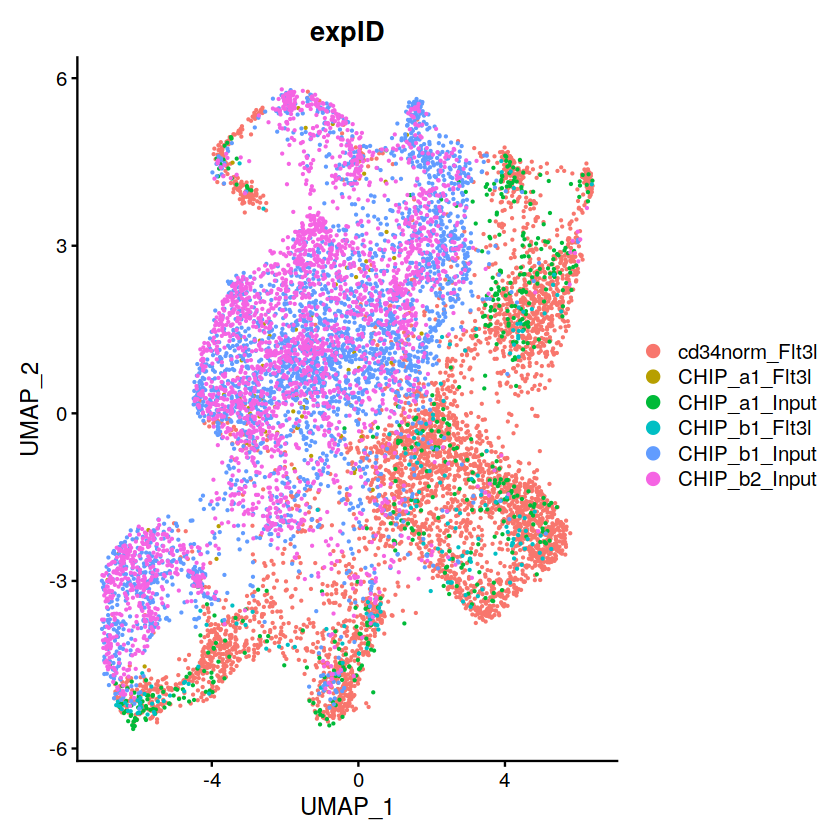

An object of class Seurat 
240401 features across 10776 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

Computing nearest neighbor graph

Computing SNN

Saving 6.67 x 6.67 in image



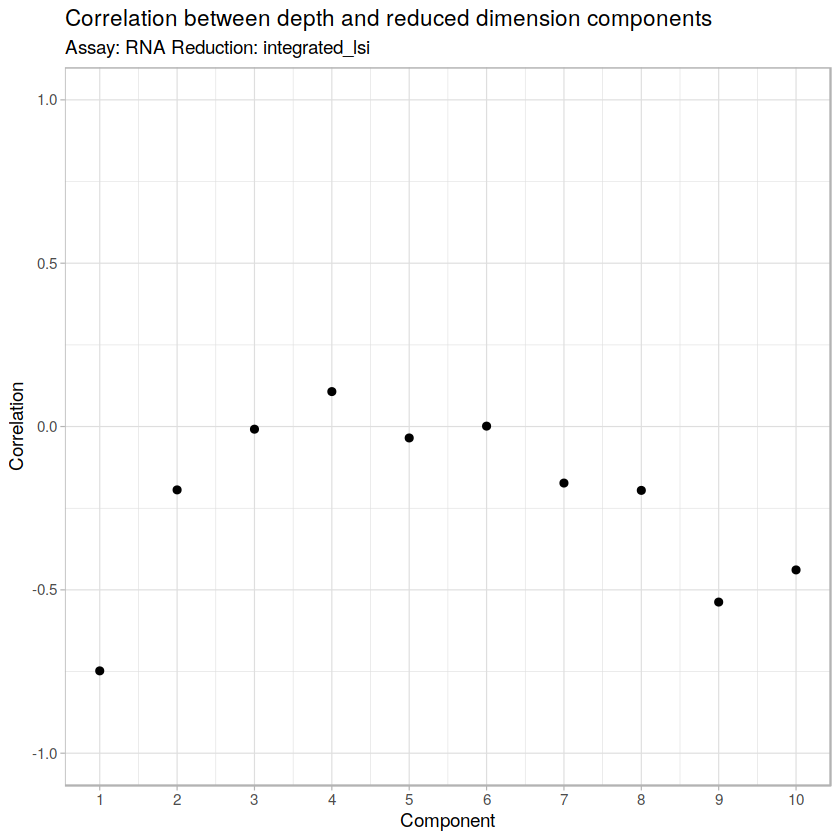

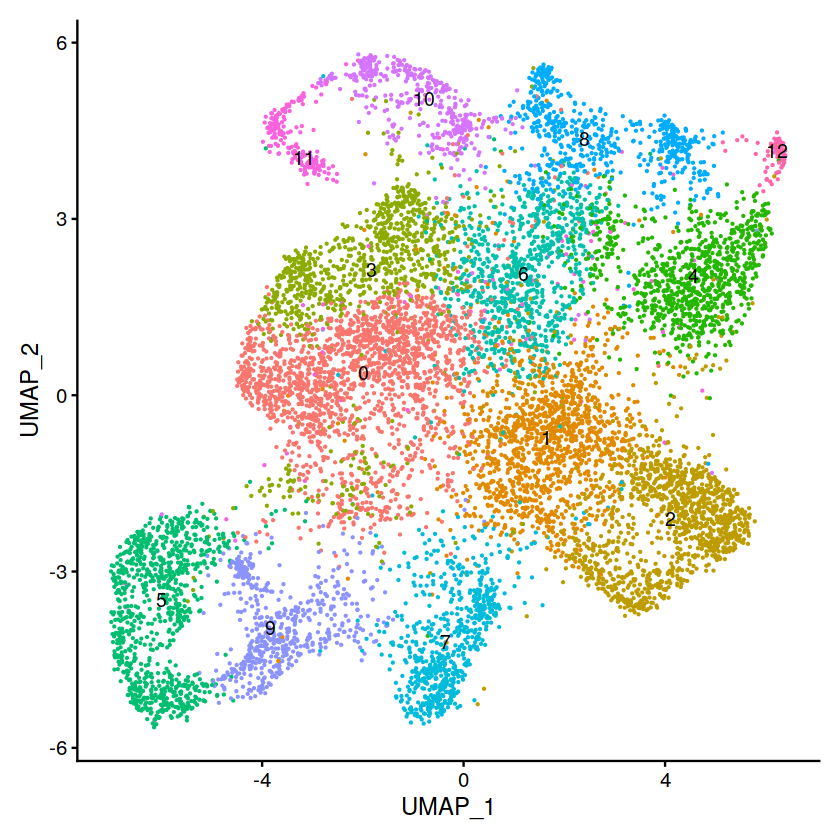

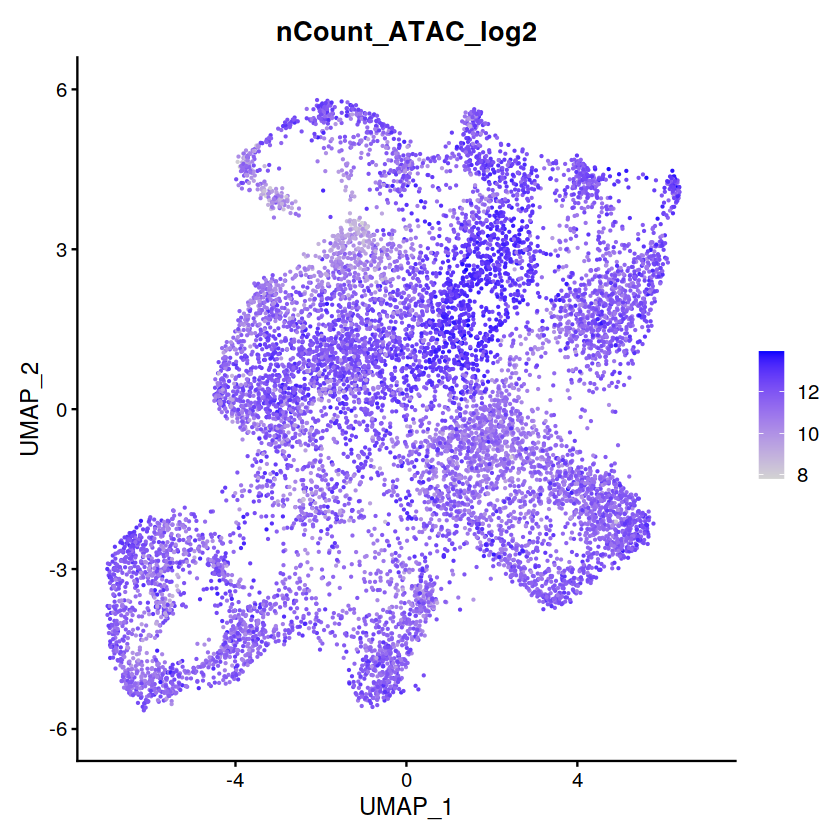

In [28]:
reduce_outdir <- file.path(outdir, "umap_rerun")
dir.create(reduce_outdir)

se.reduce <- RunUMAP(se, reduction = "integrated_lsi", dims = 2:30)
p2 <- DimPlot(se.reduce, group.by = "expID")
ggsave(file.path(reduce_outdir,"se_clonevar.batch.png"), dpi=300)
p2

pDepthCorr <- DepthCor(se.reduce, reduction='integrated_lsi')
ggsave(file.path(reduce_outdir,"se_clonevar.depthCor.png"), plot=pDepthCorr, dpi=300)

pDepthCorr



se.reduce

DefaultAssay(se.reduce) <- "ATAC"

se.reduce <- FindNeighbors(object = se.reduce, reduction = 'integrated_lsi', dims = 2:30)


se.reduce <- FindClusters(object = se.reduce, verbose = FALSE, algorithm = 3)
pclust <- DimPlot(object = se.reduce, label = TRUE) + NoLegend()
ggsave(file.path(reduce_outdir, "se_clonevar.lsi.clusters.png"), pclust)
pclust

se.reduce$nCount_ATAC_log2 = log2(se.reduce$nCount_ATAC+1)
FeaturePlot(se.reduce, features = "nCount_ATAC_log2")


In [29]:
Annotation(se.reduce) <- annotations
gene.activities <- GeneActivity(se.reduce)
mt_genes <- annotations[seqnames(annotations) == "chrM"]
dim(mt_genes)
gene.activities <- gene.activities[!(rownames(gene.activities) %in% mt_genes$gene_name),]
# add the gene activity matrix to the Seurat object as a new assay and normalize it
se.reduce[['RNA']] <- CreateAssayObject(counts = gene.activities)
se.reduce <- NormalizeData(
  object = se.reduce,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(se.reduce$nCount_RNA)
)

# add the gene information to the object
DefaultAssay(se.reduce) <- 'RNA'



Extracting gene coordinates

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions



NULL

In [30]:
# plot top clones:
ntop.clones <- length(top.clones)

top.se <- subset(x = se.reduce, subset = name %in% top.clones)
top.se$name <- factor(x = top.se$name, levels =top.clones)

coord = max(max(Embeddings(top.se[["umap"]])), abs(min(Embeddings(top.se[["umap"]]))))

reduce_outdir <- file.path(outdir, "umap_rerun")
dir.create(reduce_outdir)
for (i in levels(droplevels(top.se$donor))){   
    don.top.se <- subset(x = top.se, subset = donor == i)
    curr.ntop.clones <- length(unique(don.top.se$name))
    don.top.se$name <- factor(x = don.top.se$name, levels = top.clones)
    #DimPlot(cd8, split.by = "orig.ident")
    d <- DimPlot(object = don.top.se, label = FALSE, split.by="name", ncol=1, 
                 combine=T,
                 group.by=c("seurat_clusters"), shape.by=c("condition"), pt.size=(curr.ntop.clones/4)) +
        xlim(-1*coord-0.01,coord+0.01) +
        ylim(-1*coord-0.01,coord+0.01) + 
        theme(text = element_text(size = 2*curr.ntop.clones)) +
        theme(axis.text = element_text(size = 2*curr.ntop.clones))
    ggsave(file.path(reduce_outdir, paste(i,"top_umap_clust_col.svg")), width=2*curr.ntop.clones, height=8*curr.ntop.clones, device='svg', units="in", limitsize = FALSE)
    ggsave(file.path(reduce_outdir, paste(i,"top_umap_clust_col.pdf")), width=2*curr.ntop.clones, height=8*curr.ntop.clones, units="in", limitsize = FALSE)
}
  


Warning message in dir.create(reduce_outdir):
“'/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.prefilterMerge_impute_knnRes.30_objs_standard_constraints_None/aggregate/annotation/umap_rerun' already exists”


In [31]:
reduce_outdir

[1] "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.prefilterMerge_impute_knnRes.30_objs_standard_constraints_None/aggregate/annotation/umap_rerun"

In [ ]:
write.table(se.reduce[[]],file=file.path(reduce_outdir, "se.reduce_clonevar_cells_meta.tsv"), sep = "\t", quote=FALSE)
saveRDS(obj=se.reduce, file=file.path(reduce_outdir, "se.reduce_clonevar.rds"))

In [ ]:
#write.table(se[[]],file=file.path(outdir, "se_clonevar_cells_meta.tsv"), sep = "\t", quote=FALSE)
if(save_large_se){saveRDS(obj=se, file=file.path(outdir, "SE_clonevar.rds"))}

In [ ]:
#saveRDS(obj=se, file=file.path(outdir, "SE.rds"))